# Personal Comedy Movie Rating Project

### In this project, I will be analyzing IMDb movie ratings in order to uncover trends related to comedy films I enjoy and personally own using information sourced from the free API from the OMDb API website whice provides a free key for limited uses (https://www.omdbapi.com/)

In [115]:
# installing libraries needed to pull API
import requests

In [116]:
# Creating API & test movie to ensure that the API works as desired. 
api_key = "e8690b0d"

movie_title_test = "Inception"

In [117]:
#Constructing URL

url = f'http://www.omdbapi.com/?t={movie_title_test}&apikey={api_key}'

#make a get request

response = requests.get(url)

#Check if the request was successful

if response.status_code == 200:
    movie_data = response.json()
    print(movie_data) #This will display the movie data
else:
    print(f'Error:{response.status_code}')

{'Title': 'Inception', 'Year': '2010', 'Rated': 'PG-13', 'Released': '16 Jul 2010', 'Runtime': '148 min', 'Genre': 'Action, Adventure, Sci-Fi', 'Director': 'Christopher Nolan', 'Writer': 'Christopher Nolan', 'Actors': 'Leonardo DiCaprio, Joseph Gordon-Levitt, Elliot Page', 'Plot': 'A thief who steals corporate secrets through the use of dream-sharing technology is given the inverse task of planting an idea into the mind of a C.E.O., but his tragic past may doom the project and his team to disaster.', 'Language': 'English, Japanese, French', 'Country': 'United States, United Kingdom', 'Awards': 'Won 4 Oscars. 159 wins & 220 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjAxMzY3NjcxNF5BMl5BanBnXkFtZTcwNTI5OTM0Mw@@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '87%'}, {'Source': 'Metacritic', 'Value': '74/100'}], 'Metascore': '74', 'imdbRating': '8.8', 'imdbVotes': '2,626,859', 'imdbID'

In [118]:
def get_movie_data(movie_title, api_key):
    """
    Fetch movie data from OMDb API.
    Args:
        movie_title (str): The title of the movie.
        api_key (str): Your OMDb API key.
    Returns:
        dict: The movie data in JSON format or an error message.
    """
    url = f"http://www.omdbapi.com/?t={movie_title}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return {"Error": f"Failed to fetch data, status code {response.status_code}"}

In [119]:
# Now I will be creating a list of movies which I enjoy and own. 
#The goal of this is to explore how the movies are rated by other users and other insights. 

movie_titles = [
    'Groundhog Day',
    'Ace Ventura: Pet Detective',
    'Step Brothers',
    'Luck-Key',
    'Cold Turkey',
    'Young Frankenstein',
    'Scary Movie',
    'The Addams Family',
    'Galaxy Quest',
    'Real Genius',
    'Office Space',
    'Johnny Dangerously',
    'Zoolander',
    'Shaun of the Dead',
    'Easy Money'
]


#List to store retrieved data
jorges_favorite_comedies = []

# This loop will go through each movie title and fetch data

for title in movie_titles:
    movie_data = get_movie_data(title, api_key)
    if "Error" not in movie_data: #skip errors
        jorges_favorite_comedies.append(movie_data)
    else:
        print(f"Error fetching data for {title}: {movie_data['Error']}")

# Print of collected data
print(f"Fetched data for {len(jorges_favorite_comedies)} movies")

print(jorges_favorite_comedies[:2])

Fetched data for 15 movies
[{'Title': 'Groundhog Day', 'Year': '1993', 'Rated': 'PG', 'Released': '12 Feb 1993', 'Runtime': '101 min', 'Genre': 'Comedy, Drama, Fantasy', 'Director': 'Harold Ramis', 'Writer': 'Danny Rubin, Harold Ramis', 'Actors': 'Bill Murray, Andie MacDowell, Chris Elliott', 'Plot': 'A narcissistic, self-centered weatherman finds himself in a time loop on Groundhog Day.', 'Language': 'English, French, Italian', 'Country': 'United States', 'Awards': 'Won 1 BAFTA Award7 wins & 17 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BOWE3MjQ3ZDAtNDQ2MC00YjBjLTk0ZWYtNjQ0YzQ4YWE3YTEyXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '94%'}, {'Source': 'Metacritic', 'Value': '72/100'}], 'Metascore': '72', 'imdbRating': '8.0', 'imdbVotes': '703,290', 'imdbID': 'tt0107048', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': '$71,107,962', 'Production': 'N/A', 'Website': 'N/A', 'Re

### Now that I see that my API call works, I will begin importing pandas for some analysis and to create a data frame.     

In [121]:
import pandas as pd

# Convert the list of movie directories into a DataFrame

movies_df = pd.DataFrame(jorges_favorite_comedies)

# display the first few rows in order to verify. 

print(movies_df.head())

                        Title  Year  Rated     Released  Runtime  \
0               Groundhog Day  1993     PG  12 Feb 1993  101 min   
1  Ace Ventura: Pet Detective  1994  PG-13  04 Feb 1994   86 min   
2               Step Brothers  2008      R  25 Jul 2008   98 min   
3                    Luck-Key  2016    N/A  21 Oct 2016  112 min   
4                 Cold Turkey  1971  PG-13  19 Feb 1971   99 min   

                    Genre       Director  \
0  Comedy, Drama, Fantasy   Harold Ramis   
1                  Comedy    Tom Shadyac   
2                  Comedy     Adam McKay   
3   Action, Comedy, Crime  Kae-Byeok Lee   
4                  Comedy    Norman Lear   

                                         Writer  \
0                     Danny Rubin, Harold Ramis   
1       Jack Bernstein, Tom Shadyac, Jim Carrey   
2      Will Ferrell, Adam McKay, John C. Reilly   
3                    Yoon-Mi Jang, Kenji Uchida   
4  Norman Lear, William Price Fox, Margaret Rau   

                   

This looks great. I can tell that my curveball, Luck-Key was correctly pulled as the actors and basic story checks out Now time to save it to a csv file

In [123]:
# Now saving the data frame
movies_df.to_csv("Jorge's Favorite Comedies.csv", index=False)

print("Jorge's Favorite Comedies.csv")

Jorge's Favorite Comedies.csv


In [124]:
my_comedies = pd.read_csv(r"C:\Users\PawPaw\Desktop\Data Science Projects\Movie Data Project\Jorge's Favorite Comedies.csv", index_col='Title')
my_comedies.head()

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
Title,,,,,,,,,,,,,,,,,,,,,
Groundhog Day,1993,PG,12 Feb 1993,101 min,"Comedy, Drama, Fantasy",Harold Ramis,"Danny Rubin, Harold Ramis","Bill Murray, Andie MacDowell, Chris Elliott","A narcissistic, self-centered weatherman finds...","English, French, Italian",...,72.0,8.0,"703,290",tt0107048,movie,NaN,"$71,107,962",NaN,NaN,True
Ace Ventura: Pet Detective,1994,PG-13,04 Feb 1994,86 min,Comedy,Tom Shadyac,"Jack Bernstein, Tom Shadyac, Jim Carrey","Jim Carrey, Courteney Cox, Sean Young",A goofy detective specializing in animals goes...,English,...,37.0,6.9,"334,039",tt0109040,movie,NaN,"$72,217,396",NaN,NaN,True
Step Brothers,2008,R,25 Jul 2008,98 min,Comedy,Adam McKay,"Will Ferrell, Adam McKay, John C. Reilly","Will Ferrell, John C. Reilly, Mary Steenburgen",Two aimless middle-aged losers still living at...,"English, Spanish",...,51.0,6.9,"326,309",tt0838283,movie,NaN,"$100,468,793",NaN,NaN,True
Luck-Key,2016,NaN,21 Oct 2016,112 min,"Action, Comedy, Crime",Kae-Byeok Lee,"Yoon-Mi Jang, Kenji Uchida","Yoo Hae-jin, Lee Joon, Jo Yun-hie",A hapless loser assumes the identity of an amn...,Korean,...,NaN,6.9,"3,270",tt6175078,movie,NaN,"$466,505",NaN,NaN,True
Cold Turkey,1971,PG-13,19 Feb 1971,99 min,Comedy,Norman Lear,"Norman Lear, William Price Fox, Margaret Rau","Dick Van Dyke, Pippa Scott, Tom Poston","Hoping for positive publicity, a tobacco compa...","English, French",...,NaN,6.6,"2,486",tt0066927,movie,NaN,"$11,990,000",NaN,NaN,True


In [125]:
my_comedies.tail()

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
Title,,,,,,,,,,,,,,,,,,,,,
Office Space,1999,R,19 Feb 1999,89 min,Comedy,Mike Judge,Mike Judge,"Ron Livingston, Jennifer Aniston, David Herman",Three company workers who hate their jobs deci...,English,...,68.0,7.6,"294,623",tt0151804,movie,NaN,"$10,827,810",NaN,NaN,True
Johnny Dangerously,1984,PG-13,21 Dec 1984,90 min,"Comedy, Crime",Amy Heckerling,"Norman Steinberg, Bernie Kukoff, Harry Colomby","Michael Keaton, Joe Piscopo, Marilu Henner","Set in the 1930s, an honest, good-hearted man ...",English,...,54.0,6.5,"16,749",tt0087507,movie,NaN,"$17,124,395",NaN,NaN,True
Zoolander,2001,R,28 Sep 2001,90 min,Comedy,Ben Stiller,"Drake Sather, Ben Stiller, John Hamburg","Ben Stiller, Owen Wilson, Christine Taylor","At the end of his career, a clueless fashion m...",English,...,61.0,6.5,"301,380",tt0196229,movie,NaN,"$45,172,250",NaN,NaN,True
Shaun of the Dead,2004,R,24 Sep 2004,99 min,"Comedy, Horror",Edgar Wright,"Simon Pegg, Edgar Wright","Simon Pegg, Nick Frost, Kate Ashfield","The uneventful, aimless lives of a London elec...",English,...,76.0,7.9,"611,880",tt0365748,movie,NaN,"$14,332,569",NaN,NaN,True
Easy Money,2010,R,15 Jan 2010,124 min,"Action, Crime, Drama",Daniel Espinosa,"Daniel Espinosa, Jens Lapidus, Fredrik Wikström","Joel Kinnaman, Matias Varela, Dragomir Mrsic",When JW becomes a drug runner in order to main...,"Swedish, Serbian, Spanish, English, German",...,75.0,6.7,"19,992",tt1291652,movie,NaN,"$205,741",NaN,NaN,True


So after doing a quick quality check on the data through the tail call, I've noticed I pulled the wrong "Easy Money". My intention was to pull the 83 Rodney Dangerfield class, but instead, I got an action/drama from 2010. So before moving forward, I'm going to correct this mistake. 

In [127]:
# I will now update the incorrect row with the correct data, but it's always good to double-check!
print(my_comedies.loc['Easy Money'])

Year                                                       2010
Rated                                                         R
Released                                            15 Jan 2010
Runtime                                                 124 min
Genre                                      Action, Crime, Drama
Director                                        Daniel Espinosa
Writer          Daniel Espinosa, Jens Lapidus, Fredrik Wikström
Actors             Joel Kinnaman, Matias Varela, Dragomir Mrsic
Plot          When JW becomes a drug runner in order to main...
Language             Swedish, Serbian, Spanish, English, German
Country                        Sweden, Germany, Denmark, France
Awards                                    4 wins & 1 nomination
Poster        https://m.media-amazon.com/images/M/MV5BNTQ4OW...
Ratings       [{'Source': 'Internet Movie Database', 'Value'...
Metascore                                                  75.0
imdbRating                              

I mulled whether to manually input the data myself or to just correct the orignal API call to include "Year" in order to correct the mistake and it seems best from my point of view to just recall the API as later in the future if I decide to look into different genres this problem can return again. 

In [129]:
def get_movie_data(movie_title, api_key, year=None):
    """
    Fetch movie data from OMDb API.
    Args:
        movie_title (str): The title of the movie.
        api_key (str): My OMDb API key.
        year (str, optional): The release year of the movie to contend with duplicate title names
    Returns:
        dict: The movie data in JSON format or an error message. 
    """
    # add year to the query
    if year:
        url = f"http://www.omdbapi.com/?t={movie_title}&y={year}&apikey={api_key}"
    else:
        url = f"http://www.omdbapi.com/?t={movie_title}&apikey={api_key}"


    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return{"Error": f"failed to fetch data, status code {response.status_code}"}

In [130]:
# Now I am recreating the list and loop needed to pull the data I want. 

movie_titles = [
    'Groundhog Day',
    'Ace Ventura: Pet Detective',
    'Step Brothers',
    'Luck-Key',
    'Cold Turkey',
    'Young Frankenstein',
    'Scary Movie',
    'The Addams Family',
    'Galaxy Quest',
    'Real Genius',
    'Office Space',
    'Johnny Dangerously',
    'Zoolander',
    'Shaun of the Dead',
    'Easy Money'
]


#List to store retrieved data
jorges_favorite_comedies = []

# This is an updated loop to ensure that Easy Money is properly captured this time while also pulling the other movies on the list. 

for title in movie_titles:
    if title == "Easy Money":
        movie_data = get_movie_data(title, api_key, year="1983")  # Specify year for "Easy Money"
    else:
        movie_data = get_movie_data(title, api_key)  # Default fetch without year

    if "Error" not in movie_data:  # Skip errors
        jorges_favorite_comedies.append(movie_data)
    else:
        print(f"Error fetching data for {title}: {movie_data['Error']}")

# Print summary of collected data
print(f"Fetched data for {len(jorges_favorite_comedies)} movies")

# Display the first 2 entries
print(jorges_favorite_comedies[:2])

Fetched data for 15 movies
[{'Title': 'Groundhog Day', 'Year': '1993', 'Rated': 'PG', 'Released': '12 Feb 1993', 'Runtime': '101 min', 'Genre': 'Comedy, Drama, Fantasy', 'Director': 'Harold Ramis', 'Writer': 'Danny Rubin, Harold Ramis', 'Actors': 'Bill Murray, Andie MacDowell, Chris Elliott', 'Plot': 'A narcissistic, self-centered weatherman finds himself in a time loop on Groundhog Day.', 'Language': 'English, French, Italian', 'Country': 'United States', 'Awards': 'Won 1 BAFTA Award7 wins & 17 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BOWE3MjQ3ZDAtNDQ2MC00YjBjLTk0ZWYtNjQ0YzQ4YWE3YTEyXkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.0/10'}, {'Source': 'Rotten Tomatoes', 'Value': '94%'}, {'Source': 'Metacritic', 'Value': '72/100'}], 'Metascore': '72', 'imdbRating': '8.0', 'imdbVotes': '703,290', 'imdbID': 'tt0107048', 'Type': 'movie', 'DVD': 'N/A', 'BoxOffice': '$71,107,962', 'Production': 'N/A', 'Website': 'N/A', 'Re

In [131]:
# converting the list of dictionaries into a dataframe

movies_df = pd.DataFrame(jorges_favorite_comedies)

# displaying the first few rows
print(movies_df.head())

                        Title  Year  Rated     Released  Runtime  \
0               Groundhog Day  1993     PG  12 Feb 1993  101 min   
1  Ace Ventura: Pet Detective  1994  PG-13  04 Feb 1994   86 min   
2               Step Brothers  2008      R  25 Jul 2008   98 min   
3                    Luck-Key  2016    N/A  21 Oct 2016  112 min   
4                 Cold Turkey  1971  PG-13  19 Feb 1971   99 min   

                    Genre       Director  \
0  Comedy, Drama, Fantasy   Harold Ramis   
1                  Comedy    Tom Shadyac   
2                  Comedy     Adam McKay   
3   Action, Comedy, Crime  Kae-Byeok Lee   
4                  Comedy    Norman Lear   

                                         Writer  \
0                     Danny Rubin, Harold Ramis   
1       Jack Bernstein, Tom Shadyac, Jim Carrey   
2      Will Ferrell, Adam McKay, John C. Reilly   
3                    Yoon-Mi Jang, Kenji Uchida   
4  Norman Lear, William Price Fox, Margaret Rau   

                   

In [132]:
# Inspecting columns

print(movies_df.columns)

Index(['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response'],
      dtype='object')


In [133]:
# Saving to NEW csv file

movies_df.to_csv("Jorge's Favorite Comedies Corrected.csv", index=False)

In [134]:
my_comedies = pd.read_csv(r"C:\Users\PawPaw\Desktop\Data Science Projects\Movie Data Project\Jorge's Favorite Comedies Corrected.csv", index_col='Title')
my_comedies.head()

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
Title,,,,,,,,,,,,,,,,,,,,,
Groundhog Day,1993,PG,12 Feb 1993,101 min,"Comedy, Drama, Fantasy",Harold Ramis,"Danny Rubin, Harold Ramis","Bill Murray, Andie MacDowell, Chris Elliott","A narcissistic, self-centered weatherman finds...","English, French, Italian",...,72.0,8.0,"703,290",tt0107048,movie,NaN,"$71,107,962",NaN,NaN,True
Ace Ventura: Pet Detective,1994,PG-13,04 Feb 1994,86 min,Comedy,Tom Shadyac,"Jack Bernstein, Tom Shadyac, Jim Carrey","Jim Carrey, Courteney Cox, Sean Young",A goofy detective specializing in animals goes...,English,...,37.0,6.9,"334,039",tt0109040,movie,NaN,"$72,217,396",NaN,NaN,True
Step Brothers,2008,R,25 Jul 2008,98 min,Comedy,Adam McKay,"Will Ferrell, Adam McKay, John C. Reilly","Will Ferrell, John C. Reilly, Mary Steenburgen",Two aimless middle-aged losers still living at...,"English, Spanish",...,51.0,6.9,"326,309",tt0838283,movie,NaN,"$100,468,793",NaN,NaN,True
Luck-Key,2016,NaN,21 Oct 2016,112 min,"Action, Comedy, Crime",Kae-Byeok Lee,"Yoon-Mi Jang, Kenji Uchida","Yoo Hae-jin, Lee Joon, Jo Yun-hie",A hapless loser assumes the identity of an amn...,Korean,...,NaN,6.9,"3,270",tt6175078,movie,NaN,"$466,505",NaN,NaN,True
Cold Turkey,1971,PG-13,19 Feb 1971,99 min,Comedy,Norman Lear,"Norman Lear, William Price Fox, Margaret Rau","Dick Van Dyke, Pippa Scott, Tom Poston","Hoping for positive publicity, a tobacco compa...","English, French",...,NaN,6.6,"2,486",tt0066927,movie,NaN,"$11,990,000",NaN,NaN,True


In [135]:
my_comedies.tail()

,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,Language,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
Title,,,,,,,,,,,,,,,,,,,,,
Office Space,1999,R,19 Feb 1999,89 min,Comedy,Mike Judge,Mike Judge,"Ron Livingston, Jennifer Aniston, David Herman",Three company workers who hate their jobs deci...,English,...,68.0,7.6,"294,623",tt0151804,movie,NaN,"$10,827,810",NaN,NaN,True
Johnny Dangerously,1984,PG-13,21 Dec 1984,90 min,"Comedy, Crime",Amy Heckerling,"Norman Steinberg, Bernie Kukoff, Harry Colomby","Michael Keaton, Joe Piscopo, Marilu Henner","Set in the 1930s, an honest, good-hearted man ...",English,...,54.0,6.5,"16,749",tt0087507,movie,NaN,"$17,124,395",NaN,NaN,True
Zoolander,2001,R,28 Sep 2001,90 min,Comedy,Ben Stiller,"Drake Sather, Ben Stiller, John Hamburg","Ben Stiller, Owen Wilson, Christine Taylor","At the end of his career, a clueless fashion m...",English,...,61.0,6.5,"301,380",tt0196229,movie,NaN,"$45,172,250",NaN,NaN,True
Shaun of the Dead,2004,R,24 Sep 2004,99 min,"Comedy, Horror",Edgar Wright,"Simon Pegg, Edgar Wright","Simon Pegg, Nick Frost, Kate Ashfield","The uneventful, aimless lives of a London elec...",English,...,76.0,7.9,"611,880",tt0365748,movie,NaN,"$14,332,569",NaN,NaN,True
Easy Money,1983,R,19 Aug 1983,95 min,Comedy,James Signorelli,"Rodney Dangerfield, Michael Endler, P.J. O'Rourke","Rodney Dangerfield, Joe Pesci, Geraldine Fitzg...",To inherit his mother-in-law's colossal fortun...,English,...,48.0,6.2,"10,493",tt0085470,movie,NaN,"$29,309,766",NaN,NaN,True


And now we're back. I have not only ensured that Easy Money is correctly in my data, but I didn't lose any of the other movies in redoing my API call
But this could be better. Let me pull an API call from my own personal movie collection instead as it's easier for me to grab a larger list. 

In order to do this, I will make my personal movie collection Google sheet viewable by anyone with the link. From there I will load it via Python. 

In [137]:
# my call to my sheet

google_sheet_url = "https://docs.google.com/spreadsheets/d/1Ek8vHNtl6_hfIK4vFV8-n1ju0fwxJ0PWWGm6yoP0pPA/export?format=csv"

# loading the data into a DataFrame

sheet_data = pd.read_csv(google_sheet_url)

# Display the first few rows
print(sheet_data.head())

                        Title   Genre Release Year Release Decade Format  \
0  Friday the 13th The Series  Horror         1987          1980s     TV   
1                  Ghost Ship  Horror         2002          2000s  Movie   
2                The Stangers  Horror         2008          2000s  Movie   
3                    Phantasm  Horror         1979          1970s  Movie   
4                 Poltergeist  Horror         1982          1980s  Movie   

                              IMDB Link  Rating Wiki Page  
0  https://www.imdb.com/title/tt0092357     NaN       NaN  
1  https://www.imdb.com/title/tt0288477     NaN       NaN  
2  https://www.imdb.com/title/tt0482606     NaN       NaN  
3  https://www.imdb.com/title/tt0079714     NaN       NaN  
4  https://www.imdb.com/title/tt0084516     NaN       NaN  


Now that the Google Sheet loaded correctly, I want to inspect the data and do some structural changes as needed

In [139]:
print(sheet_data.tail())

                   Title          Genre Release Year Release Decade  Format  \
689  Big Girls Don't Cry         Comedy         1991          1990s   Movie   
690         Cowboy Bebop          Anime         1998          1990s  Anime    
691  One cut of the Dead         Comedy         2017          2010s   Movie   
692      The Seventh Day       Thriller         2020          2020s   Movie   
693    Doom Annihilation  Action/Horror         2019          2010s   Movie   

                                  IMDB Link  Rating  \
689    https://www.imdb.com/title/tt0101444     NaN   
690   https://www.imdb.com/title/tt0213338/     NaN   
691   https://www.imdb.com/title/tt7914416/     NaN   
692  https://www.imdb.com/title/tt11263022/     NaN   
693   https://www.imdb.com/title/tt8328716/     NaN   

                                             Wiki Page  
689                                                NaN  
690                                                NaN  
691  https://en.wikiped

In [140]:
print(sheet_data.columns)

Index(['Title', 'Genre', 'Release Year', 'Release Decade', 'Format',
       'IMDB Link', 'Rating', 'Wiki Page'],
      dtype='object')


In [141]:
# Checking for missing values
print(sheet_data.isnull().sum())

Title               0
Genre               0
Release Year        0
Release Decade      0
Format              0
IMDB Link         558
Rating            693
Wiki Page         686
dtype: int64


Let's now deal with missing data. 

In [143]:
#Drop rows which are missing critical data (Title, Genre, Release Year, etc.)
sheet_data.dropna(subset=['Title','Genre','Release Year','Release Decade','Format'], inplace=True)

# Ensuring that Release Year is numeric. 
sheet_data['Release Year'] = pd.to_numeric(sheet_data['Release Year'], errors='coerce')

## Exploratory Data Analysis
Here I want to do a bit of insights into the data I've collected from my personal movie collection Google Sheet. 

In [145]:
# Now let's start doing some basic counts of each of my categories and columns. 
format_counts = sheet_data['Format'].value_counts()
print(format_counts)

Format
Movie                    623
TV                        40
Animated Shorts/Films     12
Comedy Special             9
Anime                      7
TV                         1
Fighting                   1
Anime                      1
Name: count, dtype: int64


In [146]:
# Counting genres
genre_counts = sheet_data['Genre'].value_counts()
print(genre_counts)

Genre
Comedy                   122
Horror                   118
Drama                    109
Action                    59
Family                    37
                        ... 
Horror                     1
Fighting                   1
Action/Anime Inspired      1
Drama/Gothic               1
Docu-series                1
Name: count, Length: 66, dtype: int64


In [147]:
# Counting title releases by decade
decade_counts = sheet_data['Release Decade'].value_counts()
print(decade_counts)

Release Decade
2000s         340
1990s         131
1980s          94
2010s          74
1970s          30
Golden Era     15
1960s           6
2020s           4
Name: count, dtype: int64


# Data Visualizations
### Bar Chart: Titles by Format

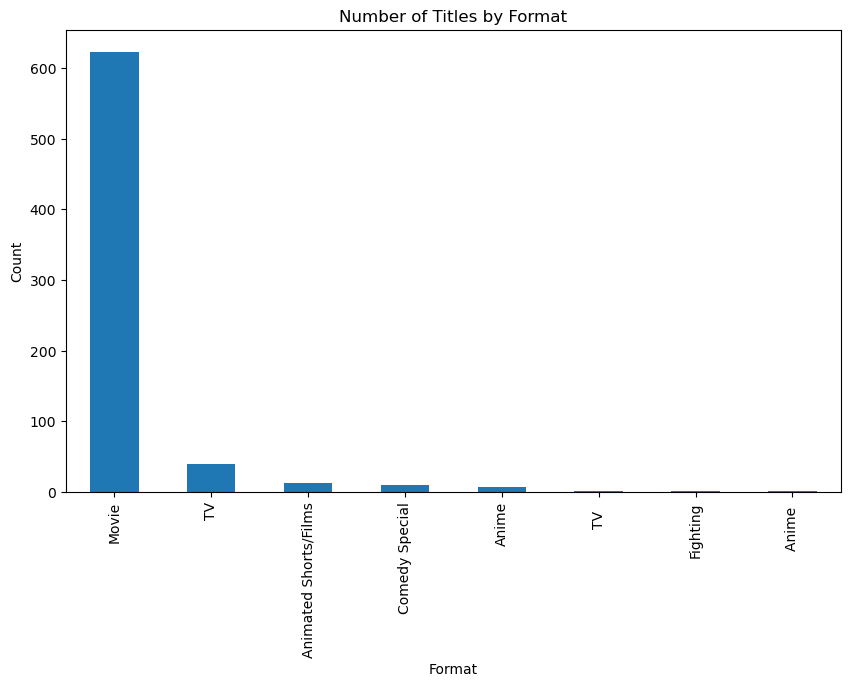

In [149]:
import matplotlib.pyplot as plt

# Plot the number of titles by format
format_counts.plot(kind='bar', figsize=(10,6))
plt.title('Number of Titles by Format')
plt.xlabel('Format')
plt.ylabel('Count')
plt.show()

## Bar Chart: Titles by Release Decade

Text(0, 0.5, 'Count')

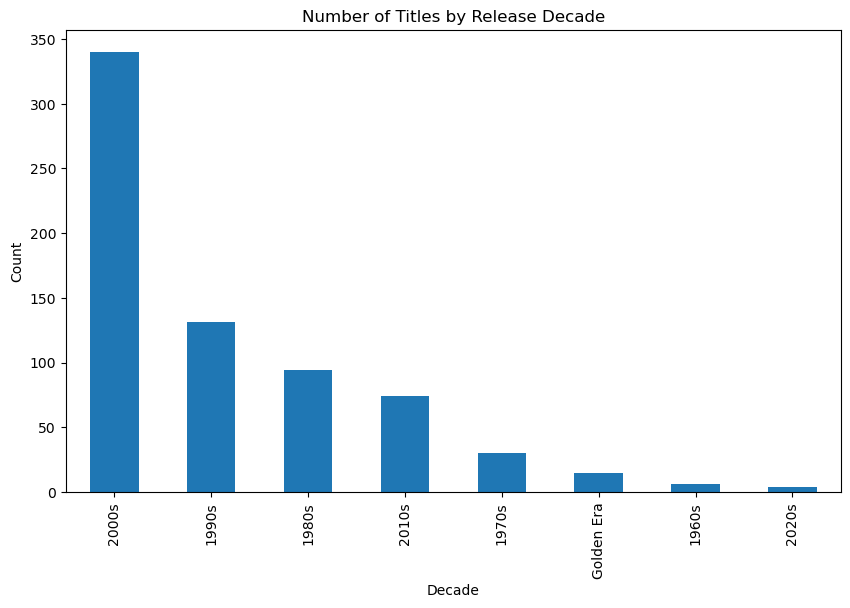

In [151]:
# Plot the number of titles by decade
decade_counts.plot(kind='bar', figsize=(10,6))
plt.title('Number of Titles by Release Decade')
plt.xlabel('Decade')
plt.ylabel('Count')

## Pie Chart: Distribution of Genres

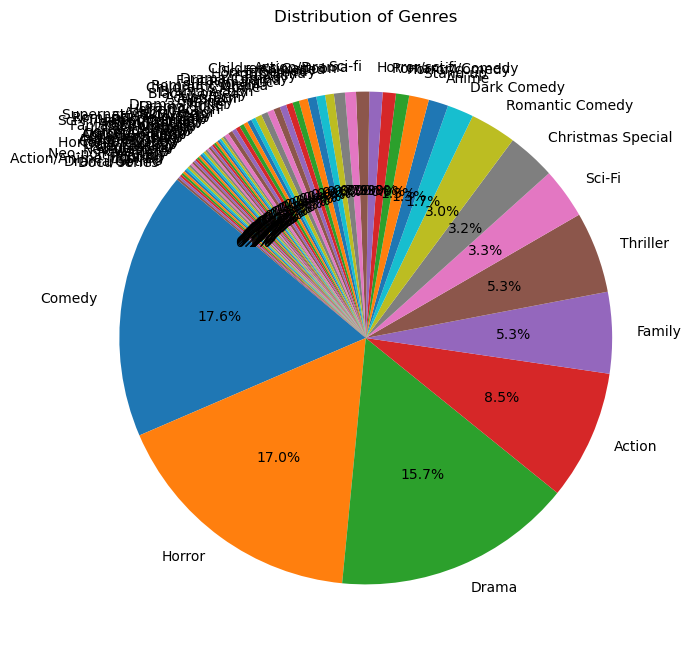

In [153]:
# Plot the distribution of genres
genre_counts.plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Genres")
plt.ylabel("") # Remove default y-axis label
plt.show()

### So as we can see there are far too many categories tomake a decent pie char that doesn't look like a mess. To correct this I will now group all of the small categories (below 3%) into a misc category. 

In [155]:
# Calculate the total number of titles
total_count = genre_counts.sum()

# Calculate the percentage for each genre
genre_percentages = (genre_counts / total_count ) * 100

# Identify genres contributing less 3%
small_genres = genre_percentages[genre_percentages < 3].index

# Replace small genres with "Miscellaneous"
sheet_data['Genre Simplified'] = sheet_data['Genre'].replace(small_genres, "Miscellaneous")

# Recalculate the counts for the simplified genres
simplified_genre_counts = sheet_data['Genre Simplified'].value_counts()

Now we can recreate a new pie chart that is simplified and doesn't take away from the data

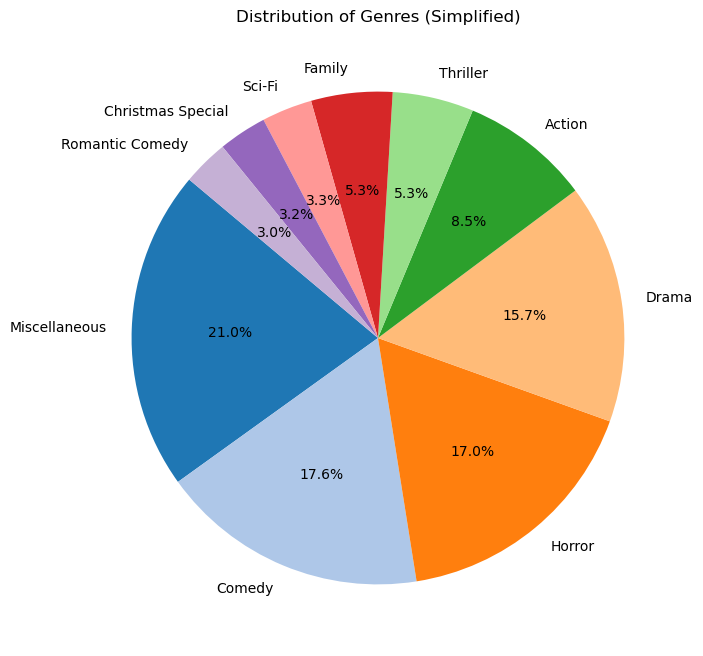

In [157]:
# Plot of the simplified genre distribution
simplified_genre_counts.plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Genres (Simplified)')
plt.ylabel("") # Remove the default y-axis label
plt.show()

### Interesting, Let's now see if we can see a pattern of genres by decade

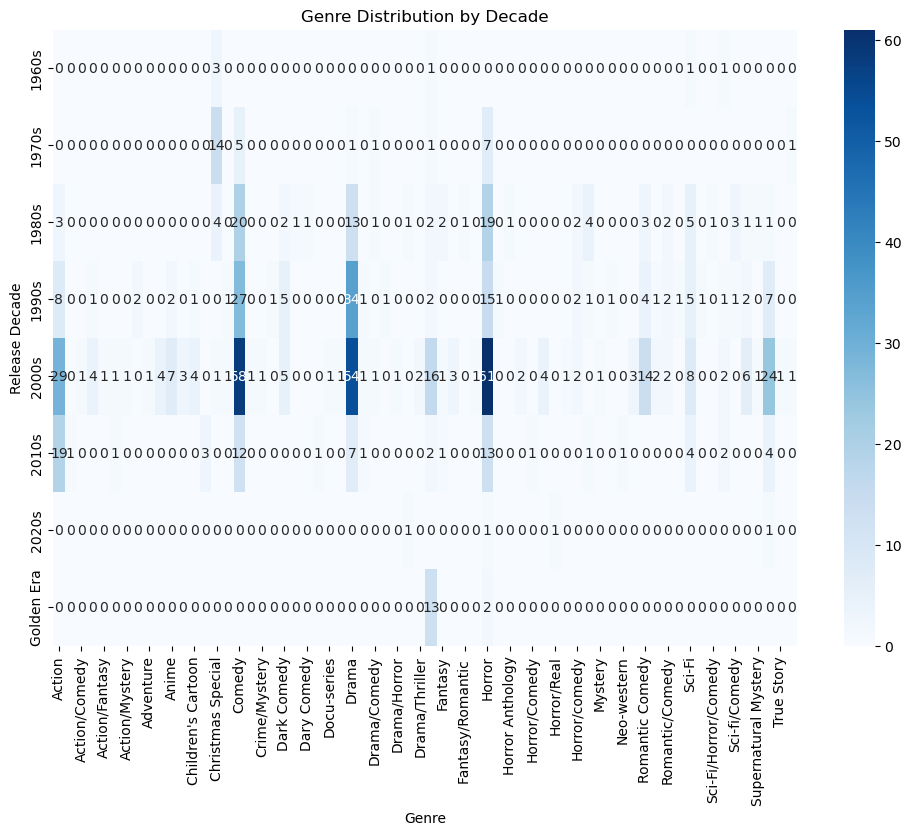

In [159]:
# Group by decade and genre
genre_decade_counts = sheet_data.groupby(['Release Decade','Genre']).size().unstack(fill_value=0)

# Plot a heatmap for genres by decade
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(genre_decade_counts, cmap='Blues', annot=True, fmt='d')
plt.title('Genre Distribution by Decade')
plt.xlabel('Genre')
plt.ylabel('Release Decade')
plt.show()

Of course, I ran into a similar issue with my original pie chart. The genre density is far too great so I will use a similar approach to simplify my genre categories and make a new heatmap.


In [161]:
#Counting genres
genre_counts = sheet_data['Genre'].value_counts()

# Defining the threshold for grouping (genres with less than five entries)
threshold = 5

# Identifying genres to group as "Miscellaneous"
small_genres = genre_counts[genre_counts < threshold].index

# Replcing small genres with "Miscellaneous"
sheet_data['Simplified Genre'] = sheet_data['Genre'].replace(small_genres, "Miscellaneous")

print(sheet_data["Simplified Genre"].value_counts())


Simplified Genre
Comedy                122
Horror                118
Drama                 109
Miscellaneous          82
Action                 59
Thriller               37
Family                 37
Sci-Fi                 23
Christmas Special      22
Romantic Comedy        21
Dark Comedy            12
Anime                   9
Stand-up                9
Horror/comedy           6
Horror/sci-fi           6
Sci-fi                  6
Romantic/Comedy         6
Children's Cartoon      5
Action/Drama            5
Name: count, dtype: int64


This should work in terms of a much simplier view of the genres located in my Google Sheet, so let's create a new heatmap 

<function matplotlib.pyplot.show(close=None, block=None)>

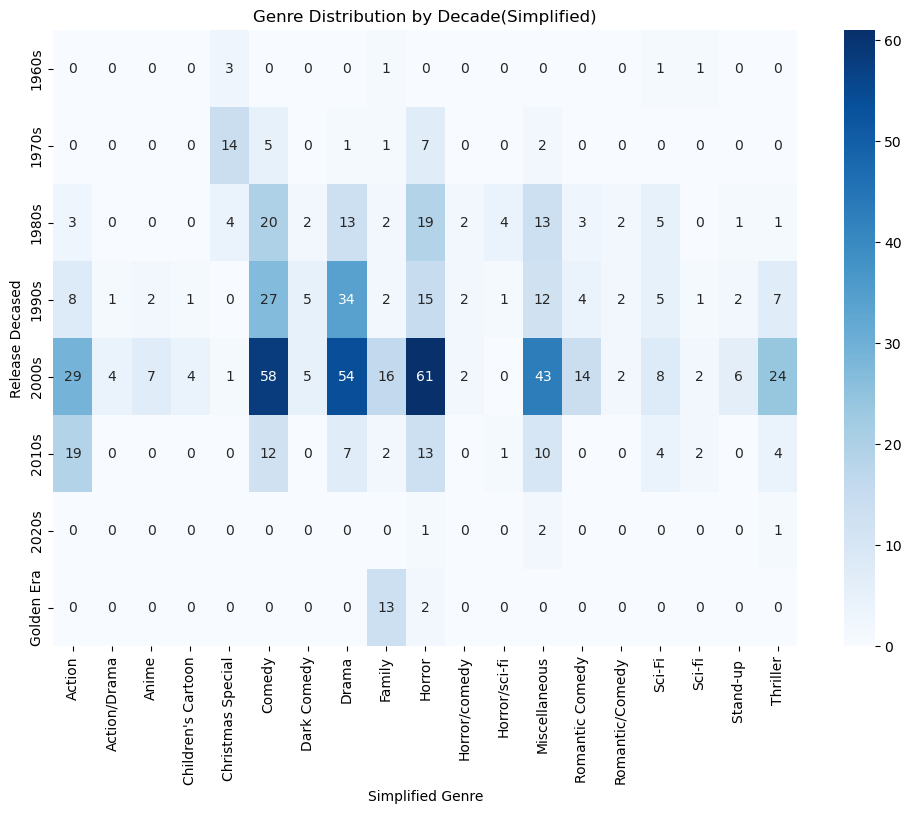

In [163]:
# Group by decade and simplifie genre
genre_decade_counts = sheet_data.groupby(["Release Decade","Simplified Genre"]).size().unstack(fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(genre_decade_counts, cmap="Blues", annot=True, fmt='d')
plt.title('Genre Distribution by Decade(Simplified)')
plt.xlabel('Simplified Genre')
plt.ylabel('Release Decased')
plt.show

### So based on the heatmap and pie chart there's a pattern in my taste, namely by the large counts of horror and comedy movies. My final visualization will now focus on comparing the two in my collection.  

In [204]:
# Filtering data and comedy genres
horror_comedy_data = sheet_data[sheet_data["Simplified Genre"].isin(['Horror','Comedy'])]

# Group by Decade and Genre
horror_comedy_trends = horror_comedy_data.groupby(["Release Decade","Simplified Genre"]).size().unstack(fill_value=0)

# Displaying the data
print(horror_comedy_trends)

Simplified Genre  Comedy  Horror
Release Decade                  
1970s                  5       7
1980s                 20      19
1990s                 27      15
2000s                 58      61
2010s                 12      13
2020s                  0       1
Golden Era             0       2


This is looking good and easy enough to visualize. 

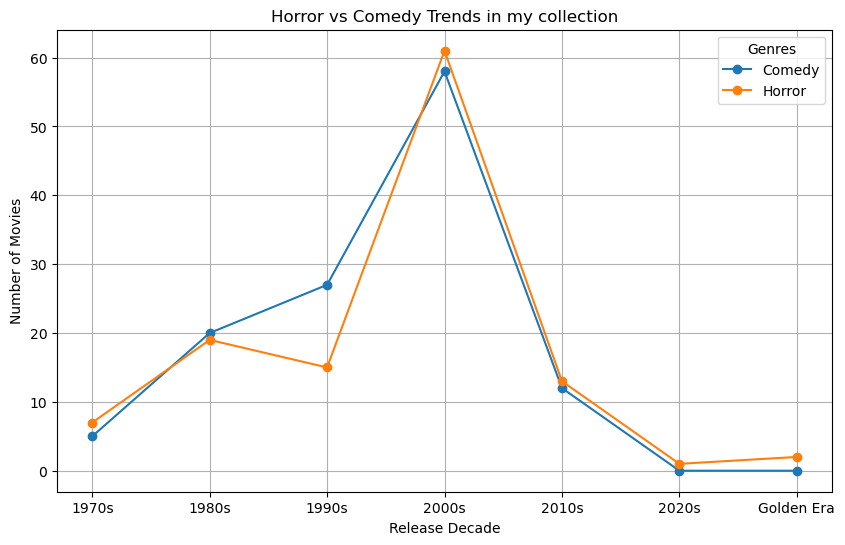

In [207]:
# Ploting the trends
horror_comedy_trends.plot(kind='line', figsize=(10,6), marker='o')

# Adding in proper title and labels
plt.title("Horror vs Comedy Trends in my collection")
plt.xlabel('Release Decade')
plt.ylabel('Number of Movies')
plt.legend(title="Genres")
plt.grid(True)
plt.show()

Let's take this to the final level and check this with percentages by decade

<function matplotlib.pyplot.show(close=None, block=None)>

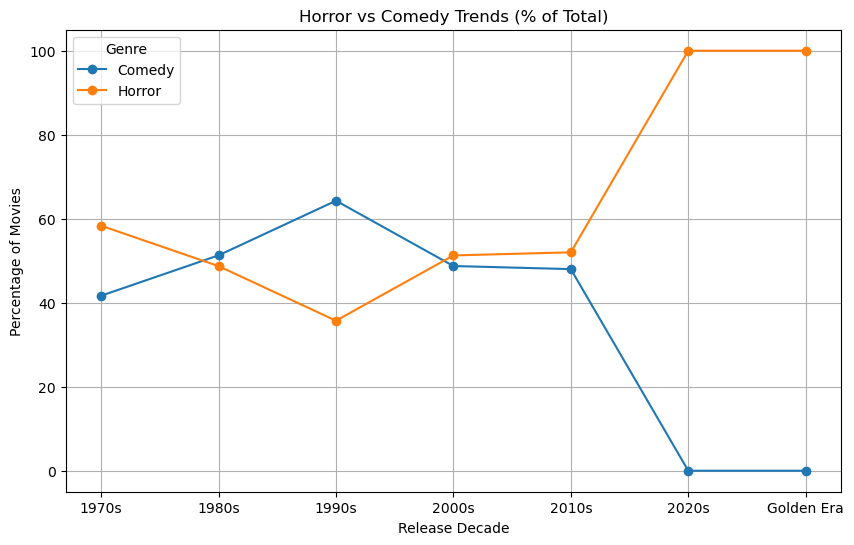

In [210]:
# Calculating Percentage
horror_comedy_percentage = horror_comedy_trends.div(horror_comedy_trends.sum(axis=1), axis=0) * 100
horror_comedy_percentage.plot(kind='line', figsize=(10,6), marker='o')
plt.title('Horror vs Comedy Trends (% of Total)')
plt.xlabel('Release Decade')
plt.ylabel('Percentage of Movies')
plt.legend(title='Genre')
plt.grid(True)
plt.show

Pretty interesting to say the least. It seems that my taste in each genre for the most part stayed close until the 2020s, but it is more likely that this is more due to the volume of movies from this new decade as it does not match previous decades. 

Thank you for taking this journey with me